# Project: Classify Portuguese banking data

Objectives: 

1. Classify, based on a binary dependent variable, which clients subscribed to a term deposit with the bank (=1) and which did not (=0).
2. Identify the main features that impact this decision.

Procedure:

1. Perform an exploratory data analysis.
2. Evaluate features.
3. Create a model.
4. Evaluate results in an explainable format.

In [2]:
import pandas as pd 
import numpy as np 
import sklearn as sk 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib
#from imp import reload

#reload(matplotlib)
#matplotlib.use('agg')

import matplotlib.pyplot as plt
#plt.interactive(False)
plt.ioff()

In [17]:
%matplotlib inline
sns.set()

In [4]:
bank_data = pd.read_csv("bank-additional/bank-additional-full.csv", sep=";")

In [5]:
bank_data_copy = bank_data.copy()

In [6]:
bank_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

For relatively small dataset (< 50,000 observations), read into local memory

In [7]:
bank_data_copy['y_binary'] = bank_data_copy.y.map(dict(yes=1, no=0));

In [8]:
bank_data_copy.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  pdays  previous     poutcome  emp.var.rate  \
0   may         mon  ...    999         0  nonexistent           1.1   
1   may         mon  ...    999         0  nonexistent           1.1   
2   may         mon  ...    999         0  nonexistent           1.1   
3   may         mon  ...    999         0  nonexistent           1.1   
4   may         mon  ...    999         0  nonexistent           1.1   

  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  y_binary  
0         93.994          -36.4      4.857       5191.0  no         0  
1         93.994          -36.4      4.857       5191.0  no         0  
2         93.994          -36.4      4.857       5191.0  no         0  
3         93.994          -36.4      4.857       5191.0  no         0  
4         93.994          -36.4      4.857       5191.0  no         0  

[5 rows x 22 columns]

# Exploratory Data Analysis

- Important for informing decisions going forward and justifying intuitions
- Remember: any normalization, filtering of features will be informed by what our objective is (classifying clients and finding contributing factors)

## Descriptive statistics

Avg age 40, stdv 10
75% of people < 40 yrs -- concentration around this point
The median (38) is less than the mean, indicating we have right skew in the data, confirmed in the histogram



In [9]:
bank_data_copy.age.median()

38.0

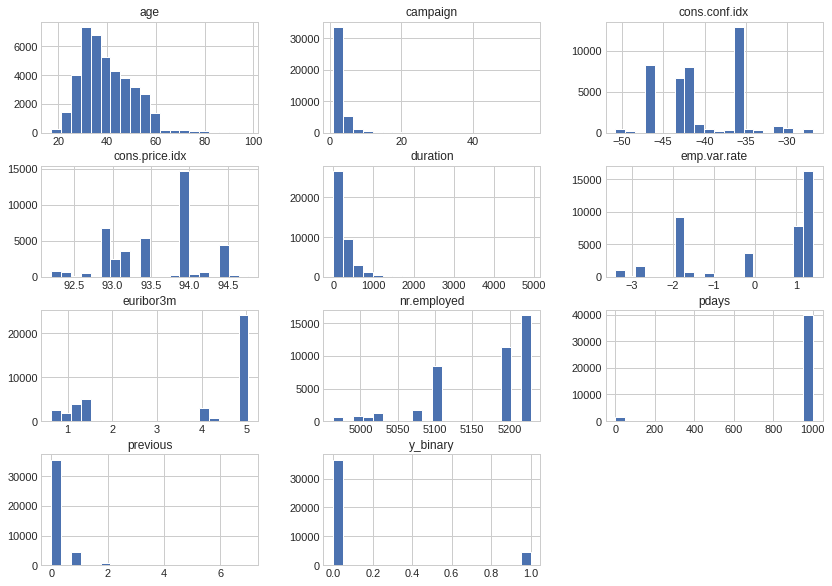

In [18]:
plt.style.use('seaborn-whitegrid')
bank_data_copy.hist(bins=20, figsize=(14,10));

In [11]:
bank_data_copy.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.628198      1.734447   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed      y_binary  
count  41188.000000  41188.000000  
mean    5167.035911      0.112654  
std       72.251528      0.316173  
min     4963.600000      0.000000  
25%     5099.100000      0.000000  
50%     5191.000000      0.000000  
75%     5228.100000      0.000000  
max     5228.100000      1.000000


## Relating independent variables to dependent variables

- Only 11.27 % of people opened a term with the bank
- More than 25% of the value counts come from university degree holders; the next largest group is high-school graduates

In [12]:
labels = 'Did not open term', 'Opened term'

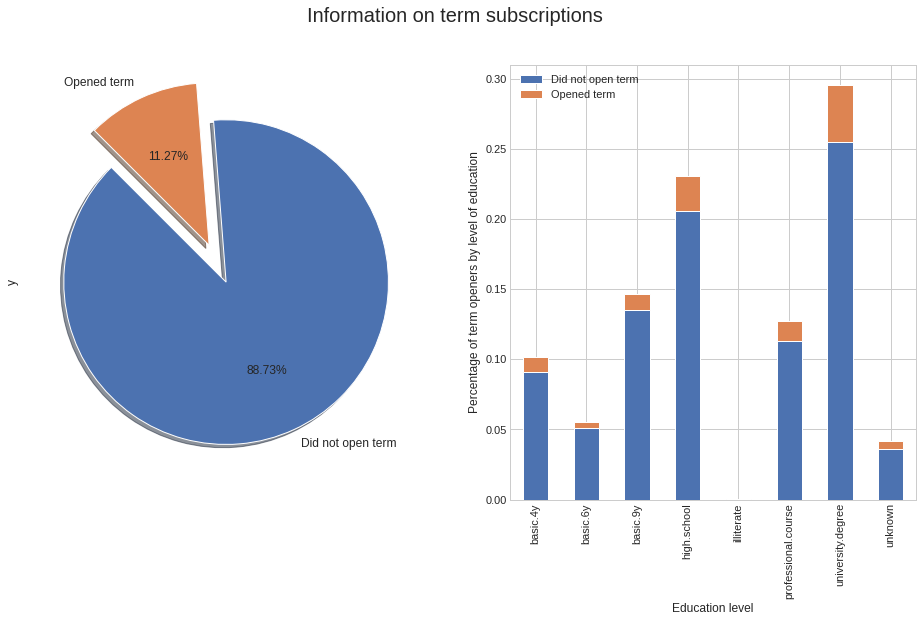

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (16, 8))

bank_data_copy.y.value_counts().plot.pie(explode=[0,0.25],
                                         autopct ='%1.2f%%', ax = ax[0], shadow = True, labels = labels,
                                         fontsize = 12, startangle = 135)
plt.suptitle('Information on term subscriptions', fontsize = 20)

df = bank_data_copy.groupby(['education','y']).size().groupby(level=0).apply(
    lambda x: x/bank_data_copy.shape[0]).unstack().plot(kind='bar', ax = ax[1], stacked = True)

ax[1].set(ylabel = 'Percentage of term openers by level of education')
ax[1].set(xlabel = 'Education level')
ax[1].legend(labels)
plt.show();

In [14]:
plt.close()

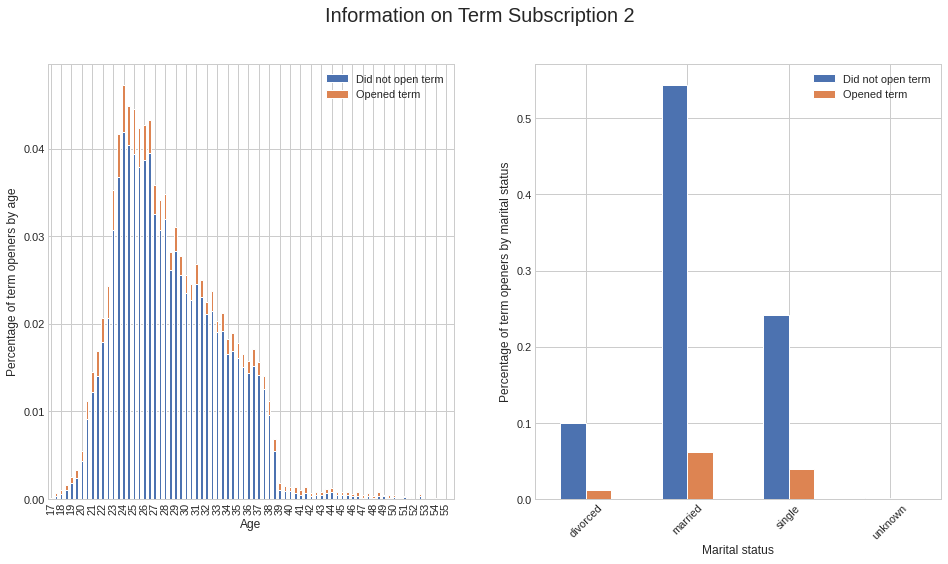

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (16, 8))
plt.suptitle('Information on Term Subscription 2', fontsize = 20)

df = bank_data_copy.groupby(['age', 'y']).size().groupby(level=0, squeeze=True).apply(lambda x: x/bank_data_copy.shape[0]).unstack().plot(kind='bar', ax=ax[0], stacked=True)

ax[0].set(ylabel = 'Percentage of term openers by age')
ax[0].set(xlabel = 'Age')
ax[0].locator_params(axis= 'x', nbins = 60)
ax[0].legend(labels)

df1 = bank_data_copy.groupby(['marital', 'y']).size().groupby(level = 0).apply(lambda x: x/bank_data_copy.shape[0]).unstack().plot(kind='bar', ax=ax[1])

ax[1].set(ylabel = 'Percentage of term openers by marital status')
ax[1].set(xlabel = 'Marital status')
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].legend(labels)

plt.show();

In [25]:
# How the data was transformed for the graphic
df = bank_data_copy.groupby(['age', 'y']).size().groupby(level=0, squeeze=True).apply(lambda x: x/bank_data_copy.shape[0]).unstack()
df.head(20)

y          no       yes
age                    
17   0.000073  0.000049
18   0.000388  0.000291
19   0.000534  0.000486
20   0.001020  0.000558
21   0.001772  0.000704
22   0.002452  0.000874
23   0.004322  0.001165
24   0.009153  0.002088
25   0.012261  0.002258
26   0.013985  0.002962
27   0.017894  0.002768
28   0.020637  0.003666
29   0.030761  0.004516
30   0.036710  0.004904
31   0.041930  0.005341
32   0.040352  0.004467
33   0.039405  0.005099
34   0.037899  0.004467
35   0.038652  0.004055
36   0.039478  0.003739

# Statistical analysis

- Encode all variables as numeric
- Check data types and statistics
- Be skeptical of your own results. People will challenge your choices and reasoning. It is in your best interests to be as transparent as possible in the process.

Capture intuition through purposeful, consistent notes and commenting at all points of the workflow to:

1. Prevent us from forgetting what we did
2. Inform our stakeholders and teammates

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
encoder = LabelEncoder()

In [28]:
dependent_var = bank_data_copy['y_binary']
encoded_df = bank_data_copy.copy()

In [29]:
encoded_df.drop(['y', 'y_binary'], axis=1, inplace=True)

In [30]:
# Apply the label encoder to the data in the dataframe
encoded_df = encoded_df.apply(encoder.fit_transform)

In [31]:
# Do a sanity check
# (These are important to do throughout, as well as taking notes)
encoded_df.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   39    3        1          0        0        0     0        1      6   
1   40    7        1          3        1        0     0        1      6   
2   20    7        1          3        0        2     0        1      6   
3   23    0        1          1        0        0     0        1      6   
4   39    7        1          3        0        0     2        1      6   

   day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1       261         0     26         0         1             8   
1            1       149         0     26         0         1             8   
2            1       226         0     26         0         1             8   
3            1       151         0     26         0         1             8   
4            1       307         0     26         0         1             8   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0              18             16        287            8  
1              18             16        287            8  
2              18             16        287            8  
3              18             16        287            8  
4              18             16        287            8

In [32]:
# Type check the data
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null int64
marital           41188 non-null int64
education         41188 non-null int64
default           41188 non-null int64
housing           41188 non-null int64
loan              41188 non-null int64
contact           41188 non-null int64
month             41188 non-null int64
day_of_week       41188 non-null int64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int64
emp.var.rate      41188 non-null int64
cons.price.idx    41188 non-null int64
cons.conf.idx     41188 non-null int64
euribor3m         41188 non-null int64
nr.employed       41188 non-null int64
dtypes: int64(20)
memory usage: 6.3 MB


In [33]:
# Check the descriptive statistics
encoded_df.describe()

age          job       marital     education       default  \
count  41188.000000  41188.00000  41188.000000  41188.000000  41188.000000   
mean      23.023623      3.72458      1.172769      3.747184      0.208872   
std       10.418993      3.59456      0.608902      2.136482      0.406686   
min        0.000000      0.00000      0.000000      0.000000      0.000000   
25%       15.000000      0.00000      1.000000      2.000000      0.000000   
50%       21.000000      2.00000      1.000000      3.000000      0.000000   
75%       30.000000      7.00000      2.000000      6.000000      0.000000   
max       77.000000     11.00000      3.000000      7.000000      2.000000   

            housing          loan       contact         month   day_of_week  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean       1.071720      0.327425      0.365252      4.230868      2.004613   
std        0.985314      0.723616      0.481507      2.320025      1.397575   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      3.000000      1.000000   
50%        2.000000      0.000000      0.000000      4.000000      2.000000   
75%        2.000000      0.000000      1.000000      6.000000      3.000000   
max        2.000000      2.000000      1.000000      9.000000      4.000000   

           duration      campaign         pdays      previous      poutcome  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean     255.084976      1.566840     25.264737      0.172963      0.930101   
std      238.907418      2.758711      3.832685      0.494901      0.362886   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      102.000000      0.000000     26.000000      0.000000      1.000000   
50%      180.000000      1.000000     26.000000      0.000000      1.000000   
75%      319.000000      2.000000     26.000000      0.000000      1.000000   
max     1543.000000     41.000000     26.000000      7.000000      2.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       6.588521       14.196489      10.335656    255.634821      7.845829  
std        2.797902        5.560136       5.978930     68.665954      2.454812  
min        0.000000        0.000000       0.000000      0.000000      0.000000  
25%        3.000000       10.000000       6.000000    214.000000      6.000000  
50%        8.000000       14.000000       8.000000    287.000000      8.000000  
75%        9.000000       18.000000      16.000000    305.000000     10.000000  
max        9.000000       25.000000      25.000000    315.000000     10.000000

We model our classification as 

$$log(y) = e^{BX + E}$$

where $log(y)$ is the dependent variable,  $B$ is the coefficient weights for each feature, $X$ is the observed independent variables, and $E$ is the error term.

## Statistical testing 

At this point, the workflow calls for multiple statistical tests for statistical significance and multicollinearity and the heavy lifting of feature preprocessing. For now, we'll do a cursory version in the form of a correlation matrix.

In [34]:
# Make a correlation matrix

correlation_df = pd.concat([encoded_df, dependent_var], axis=1)

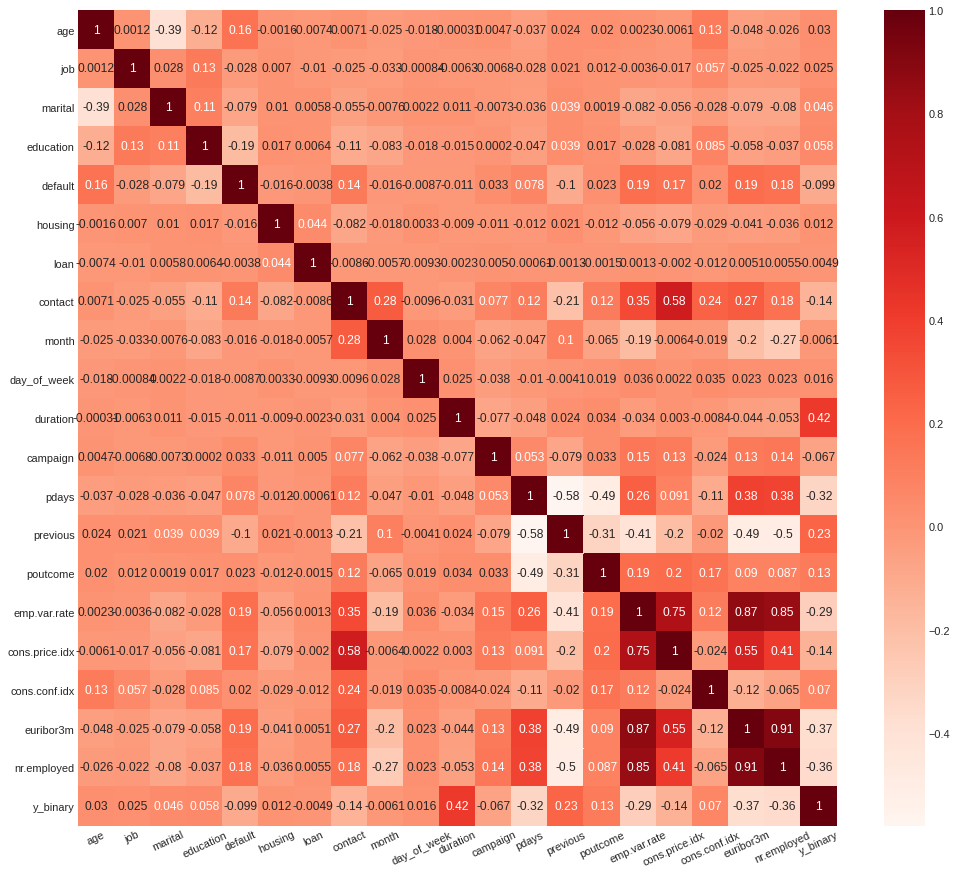

In [35]:
plt.figure(figsize=(17,15))
cor = correlation_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.tick_params(axis='x', labelrotation=25)
plt.show();

What does this tell us? If we have done a good job capturing our intuitions in an explainable manor so far, we should be able to say _how_ we made this map as well as _why_.

- Infer feature importance relative to the dependent variable (recursive feature elimination and quantitative statistical tests are more sophisticated than eyeballing a heatmap, but we can still see correlation with the dependent variable). We can immediately see that `duration` is strongly correlated with `y`.
- Which features have multicollinearity, having a latent relationship with each other and trend together/inverted (either positive or negative).


- This is not a regression process, so we do not have the statistical significance of each feature. Rather, we will isolate collinear features and remove them to reduce the dimensionality of the data and improve model performance.

In [36]:
# Step 1: find features that are highly correlated with y

cor_target = abs(cor['y_binary']) # the absolute value of the target variable's correlation with each feature

relevant_features = cor_target[cor_target > 0.2] # Use boolean indexing to find features that have greater than twenty percent correlation with y

In [37]:
relevant_features

duration        0.419889
pdays           0.320945
previous        0.230181
emp.var.rate    0.286833
euribor3m       0.368168
nr.employed     0.355135
y_binary        1.000000
Name: y_binary, dtype: float64

In [38]:
rel_feat = relevant_features.index.tolist()
rel_feat.remove('y_binary')

In [39]:
from itertools import combinations
from IPython.display import display_html

In [42]:
dfs = []
for pair in combinations(rel_feat, 2):
    a, b = pair
    df = encoded_df[[a, b]].corr()
    c = df.to_numpy()
    c = np.fliplr(c).diagonal()[0]
    parity = 'INVERSE' if c < 0 else 'POSITIVE'
    dfs.append(df)
    if abs(c) > 0.2:
        display_html(df)
        print('\n')
        print("{} and {} have {}% correlation.".format(a, b, round(c, 3)*100))
        print("They are {}LY correlated.".format(parity))
        print("{}'s correlation with y: {}%".format(a, round(relevant_features[a], 3)*100))
        print("{}'s correlation with y: {}%".format(b, round(relevant_features[b], 3)*100))
        print('\n')

pdays 
 previous 
 
 
 
 
 pdays 
 1.000000 
 -0.579467 
 
 
 previous 
 -0.579467 
 1.000000



pdays and previous have -57.9% correlation.
They are INVERSELY correlated.
pdays's correlation with y: 32.1%
previous's correlation with y: 23.0%




pdays 
 emp.var.rate 
 
 
 
 
 pdays 
 1.000000 
 0.257204 
 
 
 emp.var.rate 
 0.257204 
 1.000000



pdays and emp.var.rate have 25.7% correlation.
They are POSITIVELY correlated.
pdays's correlation with y: 32.1%
emp.var.rate's correlation with y: 28.7%




pdays 
 euribor3m 
 
 
 
 
 pdays 
 1.000000 
 0.384668 
 
 
 euribor3m 
 0.384668 
 1.000000



pdays and euribor3m have 38.5% correlation.
They are POSITIVELY correlated.
pdays's correlation with y: 32.1%
euribor3m's correlation with y: 36.8%




pdays 
 nr.employed 
 
 
 
 
 pdays 
 1.000000 
 0.375548 
 
 
 nr.employed 
 0.375548 
 1.000000



pdays and nr.employed have 37.6% correlation.
They are POSITIVELY correlated.
pdays's correlation with y: 32.1%
nr.employed's correlation with y: 35.5%




previous 
 emp.var.rate 
 
 
 
 
 previous 
 1.000000 
 -0.405825 
 
 
 emp.var.rate 
 -0.405825 
 1.000000



previous and emp.var.rate have -40.6% correlation.
They are INVERSELY correlated.
previous's correlation with y: 23.0%
emp.var.rate's correlation with y: 28.7%




previous 
 euribor3m 
 
 
 
 
 previous 
 1.000000 
 -0.489897 
 
 
 euribor3m 
 -0.489897 
 1.000000



previous and euribor3m have -49.0% correlation.
They are INVERSELY correlated.
previous's correlation with y: 23.0%
euribor3m's correlation with y: 36.8%




previous 
 nr.employed 
 
 
 
 
 previous 
 1.000000 
 -0.499478 
 
 
 nr.employed 
 -0.499478 
 1.000000



previous and nr.employed have -49.9% correlation.
They are INVERSELY correlated.
previous's correlation with y: 23.0%
nr.employed's correlation with y: 35.5%




emp.var.rate 
 euribor3m 
 
 
 
 
 emp.var.rate 
 1.000000 
 0.868736 
 
 
 euribor3m 
 0.868736 
 1.000000



emp.var.rate and euribor3m have 86.9% correlation.
They are POSITIVELY correlated.
emp.var.rate's correlation with y: 28.7%
euribor3m's correlation with y: 36.8%




emp.var.rate 
 nr.employed 
 
 
 
 
 emp.var.rate 
 1.000000 
 0.845416 
 
 
 nr.employed 
 0.845416 
 1.000000



emp.var.rate and nr.employed have 84.5% correlation.
They are POSITIVELY correlated.
emp.var.rate's correlation with y: 28.7%
nr.employed's correlation with y: 35.5%




euribor3m 
 nr.employed 
 
 
 
 
 euribor3m 
 1.000000 
 0.912401 
 
 
 nr.employed 
 0.912401 
 1.000000



euribor3m and nr.employed have 91.2% correlation.
They are POSITIVELY correlated.
euribor3m's correlation with y: 36.8%
nr.employed's correlation with y: 35.5%




In [95]:
# Which features should we get rid of?
abs(cor['y_binary']).sort_values(ascending=True)

loan              0.004909
month             0.006065
housing           0.011552
day_of_week       0.015967
job               0.025122
age               0.030339
marital           0.046203
education         0.057799
campaign          0.066532
cons.conf.idx     0.069980
default           0.099352
poutcome          0.129789
cons.price.idx    0.140593
contact           0.144773
previous          0.230181
emp.var.rate      0.286833
pdays             0.320945
nr.employed       0.355135
euribor3m         0.368168
duration          0.419889
y_binary          1.000000
Name: y_binary, dtype: float64

## Which features should we select, and which should we drop? 

- Drop values that display multicollinearity (especially those we just reviewed), weakly correlated features
- Experiment with different combinations of features
- Play with feature selection's impact on model performance 
- Explainability is an iterative process. Important is capturing logic to adequately convey it to interested parties
- Also: overfitting, underfitting, exploding/vanishing gradients

In [43]:
encoded_df.drop(['age', 'housing', 'loan', 'default', 'day_of_week'], axis=1, inplace=True) # emp.var.rate, previous

In [44]:
encoded_df.head()

job  marital  education  contact  month  duration  campaign  pdays  \
0    3        1          0        1      6       261         0     26   
1    7        1          3        1      6       149         0     26   
2    7        1          3        1      6       226         0     26   
3    0        1          1        1      6       151         0     26   
4    7        1          3        1      6       307         0     26   

   previous  poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0         0         1             8              18             16        287   
1         0         1             8              18             16        287   
2         0         1             8              18             16        287   
3         0         1             8              18             16        287   
4         0         1             8              18             16        287   

   nr.employed  
0            8  
1            8  
2            8  
3            8  
4            8

# Train and test 

In [45]:
# Take 80% of data for training
print(bank_data_copy.shape)

(41188, 22)


In [46]:
train_len = int(0.8*bank_data_copy.shape[0])

In [ ]:
train_x, train_y = encoded_df[:train_len], dependent_var[:train_len]
test_x, test_y = encoded_df[train_len:], dependent_var[train_len:]

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
# regularization is applied by default
# For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution

log_reg = LogisticRegression(solver = 'lbfgs',    # 'lbfgs' solver for multinomial logistic regression
                             penalty='l2',        #  ridge regression adds a penalty based on the sum of the squared weights/Euclidean norm, providing larger (+/-) weights resulting in a greater penalty
                             max_iter=10000)

In [50]:
log_reg_trained = log_reg.fit(train_x, train_y)

In [51]:
print(f"Training accuracy: {log_reg.score(train_x, train_y)}")

Training accuracy: 0.9412139605462823


In [52]:
pred = log_reg.predict(test_x)

In [53]:
print(f"Test accuracy: {sk.metrics.accuracy_score(test_y, pred)}")

Test accuracy: 0.6973780043699928


In [54]:
for item in sorted(zip(encoded_df.columns.tolist(), log_reg.coef_[0]), reverse=True):
    print(f"Coefficient for '{item[0]}' is {round(item[1], 3)}")

Coefficient for 'previous' is -3.152
Coefficient for 'poutcome' is -2.47
Coefficient for 'pdays' is -0.359
Coefficient for 'nr.employed' is 0.212
Coefficient for 'month' is -0.05
Coefficient for 'marital' is 0.101
Coefficient for 'job' is 0.005
Coefficient for 'euribor3m' is 0.058
Coefficient for 'emp.var.rate' is -1.098
Coefficient for 'education' is 0.082
Coefficient for 'duration' is 0.005
Coefficient for 'contact' is 0.403
Coefficient for 'cons.price.idx' is -0.073
Coefficient for 'cons.conf.idx' is -0.053
Coefficient for 'campaign' is -0.037


# Decision tree regression

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
# Decision tree instantiated with default parameters for brevity
dec_tree = DecisionTreeClassifier()

In [57]:
tree_model = dec_tree.fit(train_x, train_y)

In [58]:
print(f"Training accuracy for decision tree: {dec_tree.score(train_x, train_y)}") # suspiciously high

Training accuracy for decision tree: 0.9999089529590288


In [59]:
pred_1 = dec_tree.predict(test_x)

In [64]:
print(f"Test accuracy for decision tree: {sk.metrics.accuracy_score(test_y, pred_1)}") # 3% worse than log reg

Test accuracy for decision tree: 0.625151735858218


# Explain the predictions with AIX360

LimeTabularExplainer explains predictions on tabular (i.e. matrix) data. For numerical features, perturb them by sampling from a Normal(0,1) and doing the inverse operation of mean-centering and scaling, according to the means and stds in the training data. For categorical features, perturb by sampling according to the training distribution, and making a binary feature that is 1 when the value is the same as the instance being explained.

* [LimeTabularExplainer](https://lime-ml.readthedocs.io/en/latest/lime.html#module-lime.lime_tabular)
* [Lime Base](https://lime-ml.readthedocs.io/en/latest/lime.html#module-lime.lime_base)

In [65]:
from aix360.algorithms.lime import LimeTabularExplainer

In [66]:
class_names = [0, 1]

In [92]:
# Select data points to inspect for our models
sample_idx = 0
sample_observation = train_x.values[sample_idx]

instance_idx = 1120

In [93]:
def print_model_predictions(model):
    print(f"The predicted class for observation #{sample_idx} is {model.predict_proba([sample_observation])}")
    print(f"The true class is {train_y.loc[sample_idx]}")

In [94]:
print_model_predictions(log_reg_trained)

The predicted class for observation #0 is [[0.99126266 0.00873734]]
The true class is 0


In [ ]:
log_lime_explainer = LimeTabularExplainer(train_x.values, class_names = class_names, feature_names = train_x.columns)

In [71]:
exp_log = log_lime_explainer.explain_instance(train_x.values[instance_idx],
                                              log_reg_trained.predict_proba,
                                              num_features=6,
                                              labels=class_names)

In [72]:
print(f"Explanation for class {class_names[0]}")
print("\n".join(map(str, exp_log.as_list(label = 0))))

print(f"Explanation for class {class_names[1]}")
print("\n".join(map(str, exp_log.as_list(label = 1))))

Explanation for class 0
('previous <= 0.00', -0.1456258982361006)
('7.00 < emp.var.rate <= 8.00', 0.10341274125685196)
('100.00 < duration <= 175.00', 0.08085510183991686)
('0.00 < contact <= 1.00', -0.03623821148313687)
('nr.employed <= 8.00', 0.03570496570888065)
('17.00 < cons.price.idx <= 18.00', 0.026335056720032956)
Explanation for class 1
('previous <= 0.00', 0.1456258982361006)
('7.00 < emp.var.rate <= 8.00', -0.10341274125685196)
('100.00 < duration <= 175.00', -0.08085510183991687)
('0.00 < contact <= 1.00', 0.03623821148313689)
('nr.employed <= 8.00', -0.03570496570888062)
('17.00 < cons.price.idx <= 18.00', -0.02633505672003297)


In [74]:
exp_log.show_in_notebook() #for any feature, log odds for class 1 are inverse log odds for class 0 (simple binary classification)

In [ ]:
# objective met: successfully classified users w/i 70 pct acc on training; identified features contributing most to the outcome

## Evaluating LIME

**Monotonicity**: the idea that each added feature increases the ability of the model to discriminate classes

**Faithfulness**: the correlation between the locally perturbed model and the actual model, indicating if the local explanation's model is faithful to the original model (value in $[-1, 1]$)

In [75]:
from aix360.metrics import faithfulness_metric, monotonicity_metric

In [107]:
idx = 0

In [108]:
predicted_class = log_reg.predict(test_x.values[idx].reshape(1, -1))[0]

local_explanation = exp_log.local_exp[predicted_class]
map_ = exp_log.as_map()
x = test_x.values[idx]

coefs = np.zeros(x.shape[0])

for v in local_explanation:
    coefs[v[0]] = v[1]

base = np.zeros(x.shape[0])

print("Faithfulness: ", faithfulness_metric(log_reg, x, coefs, base))
print("Monotonicity: ", monotonicity_metric(log_reg, x, coefs, base))


Faithfulness:  0.11142784226247285
Monotonicity:  False


In [180]:
from model_explainer import ModelExplainer

In [182]:
tree_lime_explainer = ModelExplainer(train_x=train_x, test_x=test_x, model=dec_tree, class_names=class_names, num_features=6)

In [183]:
log_reg_explainer = ModelExplainer(train_x=train_x, test_x=test_x, model=log_reg_trained, class_names=class_names, num_features=6)

In [184]:
tree_lime_explainer.explain_one(1120)

Explanation for class 0
('271.00 < euribor3m <= 291.00', 0.11688668865975575)
('4.00 < month <= 6.00', 0.10744618530917317)
('poutcome <= 1.00', 0.10582286354415837)
('100.00 < duration <= 175.00', 0.05953450630335672)
('nr.employed <= 8.00', -0.01919100175908193)
('8.00 < cons.conf.idx <= 16.00', 0.01510087839505794)


Explanation for class 1
('271.00 < euribor3m <= 291.00', -0.11688668865975575)
('4.00 < month <= 6.00', -0.10744618530917316)
('poutcome <= 1.00', -0.10582286354415829)
('100.00 < duration <= 175.00', -0.05953450630335672)
('nr.employed <= 8.00', 0.01919100175908193)
('8.00 < cons.conf.idx <= 16.00', -0.015100878395057974)


In [185]:
log_reg_explainer.explain_one(1120)

Explanation for class 0
('poutcome <= 1.00', -0.20060032116011536)
('previous <= 0.00', -0.15154720789965542)
('7.00 < emp.var.rate <= 8.00', 0.11796971205815783)
('100.00 < duration <= 175.00', 0.08934606200511247)
('nr.employed <= 8.00', 0.053004745932102824)
('0.00 < contact <= 1.00', -0.021666188551503537)


Explanation for class 1
('poutcome <= 1.00', 0.20060032116011536)
('previous <= 0.00', 0.15154720789965542)
('7.00 < emp.var.rate <= 8.00', -0.11796971205815783)
('100.00 < duration <= 175.00', -0.08934606200511244)
('nr.employed <= 8.00', -0.053004745932102824)
('0.00 < contact <= 1.00', 0.021666188551503537)


In [186]:
tree_lime_explainer.show_exp(0)

Explanation for class 0
('271.00 < euribor3m <= 291.00', 0.1239675937290139)
('4.00 < month <= 6.00', 0.0869858645595742)
('175.00 < duration <= 314.00', 0.08106476034355842)
('8.00 < cons.conf.idx <= 16.00', 0.023751254046023042)
('2.00 < job <= 7.00', 0.019064426505903332)
('campaign <= 0.00', -0.01638823605925591)


Explanation for class 1
('271.00 < euribor3m <= 291.00', -0.12396759372901386)
('4.00 < month <= 6.00', -0.0869858645595742)
('175.00 < duration <= 314.00', -0.08106476034355846)
('8.00 < cons.conf.idx <= 16.00', -0.023751254046023046)
('2.00 < job <= 7.00', -0.019064426505903346)
('campaign <= 0.00', 0.016388236059255927)


In [187]:
log_reg_explainer.show_exp(0)

Explanation for class 0
('previous <= 0.00', -0.16832886763966443)
('7.00 < emp.var.rate <= 8.00', 0.08728583460023766)
('175.00 < duration <= 314.00', 0.047628933448969)
('nr.employed <= 8.00', 0.04568847231258193)
('8.00 < cons.conf.idx <= 16.00', 0.04392679060268215)
('17.00 < cons.price.idx <= 18.00', 0.035267801874616166)


Explanation for class 1
('previous <= 0.00', 0.16832886763966443)
('7.00 < emp.var.rate <= 8.00', -0.08728583460023767)
('175.00 < duration <= 314.00', -0.047628933448968985)
('nr.employed <= 8.00', -0.04568847231258193)
('8.00 < cons.conf.idx <= 16.00', -0.04392679060268215)
('17.00 < cons.price.idx <= 18.00', -0.035267801874616166)


In [188]:
tree_lime_explainer.evaluate_lime(0)

Faithfulness:  0.4398869403899518
Monotonicity:  False


In [189]:
log_reg_explainer.evaluate_lime(1120)

Faithfulness:  0.17953666381339312
Monotonicity:  False


In [179]:
%load_ext autoreload
%autoreload 2

In [200]:
%history -f history.txt

# Lale

- leverage sklearn's models to see what model is most performant, freeing up time to work on the data

In [201]:
from lale.lib.sklearn import (
    PCA,
    LogisticRegression,
    KNeighborsClassifier as Kn,
    DecisionTreeClassifier as tree,
    SVC,
    RandomForestClassifier as rf
    )
from lale.lib.xgboost import XGBClassifier as xgb

from lale.lib.lale import NoOp, ConcatFeatures

In [202]:
import lale
import lale.helpers
from lale.lib.lale import Hyperopt
lale.wrap_imported_operators()

In [203]:
explainable_pipe = lale.operators.make_union(PCA, NoOp) >> (LogisticRegression | Kn | tree)

In [204]:
explainable_train = explainable_pipe.auto_configure(train_x, train_y, optimizer=Hyperopt, cv=3,
                                                    max_evals=3, scoring='accuracy')

100%|██████████| 3/3 [00:12<00:00,  4.16s/trial, best loss: -0.9362670712027817]


In [205]:
explainable_train.pretty_print(show_imports=False, ipython_display=True)

```python
pca = PCA(svd_solver='randomized', whiten=True)
decision_tree_classifier = DecisionTreeClassifier(max_features=0.9411552821855839, min_samples_leaf=0.1713387989606097, min_samples_split=0.4296223120175698, splitter='random')
pipeline = (pca & NoOp()) >> ConcatFeatures() >> decision_tree_classifier
```

In [209]:
lale_lime_explainer = LimeTabularExplainer(train_x.values, class_names=[0,1], feature_names=train_x.columns, discretize_continuous=True)

In [210]:
print(f"The predicted class is {explainable_train.predict([train_x.values[idx]])}")
print(f"The true class is {train_y.loc[idx]}")

The predicted class is [0]
The true class is 0


In [211]:
explainable_exp = lale_lime_explainer.explain_instance(train_x.values[idx],
                                      explainable_train.predict_proba,
                                      num_features=5, 
                                      labels=[0,1])

In [212]:
print(f"Explanation for class {class_names[0]}")
print("\n".join(map(str, explainable_exp.as_list(label = 0))))
print("\n")
print(f"Explanation for class {class_names[1]}")
print("\n".join(map(str, explainable_exp.as_list(label = 1))))

Explanation for class 0
('poutcome <= 1.00', 0.027730403183394956)
('0.00 < contact <= 1.00', 0.022558263432184332)
('271.00 < euribor3m <= 291.00', 0.01247511486787694)
('previous <= 0.00', -0.010748053467590502)
('nr.employed <= 8.00', 0.0017568868383697155)


Explanation for class 1
('poutcome <= 1.00', -0.027730403183394918)
('0.00 < contact <= 1.00', -0.022558263432184335)
('271.00 < euribor3m <= 291.00', -0.012475114867876922)
('previous <= 0.00', 0.010748053467590486)
('nr.employed <= 8.00', -0.001756886838369712)


In [215]:
explainable_exp.show_in_notebook(show_table=True, show_all=False)